Цель работы - первичный анализ данных:
    - устранение ошибок
    - заполнение пропусков
    - оценка распределения загруженных величин
    - взаимный корреляционный анализ данных
    - отбор взаимно коррелирующих переменных как основы для последующего анализа и построения моделей машинного обучения

Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import collections

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

Загрузка датасета

In [2]:
students = pd.read_csv('stud_math.csv')

In [3]:
display(students.head(10))
students.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

скорректируем названия колонок

In [5]:
students.columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_gran', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']

In [6]:
# проверим наличие и количество незаполненных значений
students.isna().sum()

school             0
sex                0
age                0
address           17
famsize           27
Pstatus           45
Medu               3
Fedu              24
Mjob              19
Fjob              36
reason            17
guardian          31
traveltime        28
studytime          7
failures          22
schoolsup          9
famsup            39
paid              40
activities        14
nursery           16
studytime_gran     7
higher            20
internet          34
romantic          31
famrel            27
freetime          11
goout              8
health            15
absences          12
score              6
dtype: int64

In [7]:
display(students.head(100))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_gran,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,GP,F,15,R,GT3,T,1.0,1.0,at_home,other,home,mother,2.0,4.0,1.0,yes,yes,yes,yes,yes,-12.0,yes,yes,no,3.0,1.0,2.0,1.0,2.0,50.0
96,GP,M,16,NaN,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,-3.0,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0
97,GP,F,16,U,GT3,T,2.0,1.0,other,other,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,yes,4.0,3.0,5.0,5.0,2.0,50.0
98,GP,F,16,U,GT3,T,4.0,4.0,other,other,reputation,NaN,1.0,1.0,0.0,no,NaN,no,yes,no,-3.0,yes,NaN,no,5.0,3.0,4.0,1.0,6.0,70.0


Проверка столбцов на корректность введенных данных

In [8]:
students.school.unique()

array(['GP', 'MS'], dtype=object)

In [9]:
students.sex.unique()

array(['F', 'M'], dtype=object)

In [10]:
students.age.unique()

array([18, 17, 15, 16, 19, 22, 20, 21])

In [11]:
students.address.unique()

array(['U', nan, 'R'], dtype=object)

In [12]:
# заполняем пустые значения NA - нет ответа
students.address = students.address.fillna('NA')

In [13]:
students.famsize.unique()

array([nan, 'GT3', 'LE3'], dtype=object)

In [14]:
# заполняем пустые значения NA - нет ответа
students.famsize = students.famsize.fillna('NA')

In [15]:
students.Pstatus.unique()

array(['A', nan, 'T'], dtype=object)

In [16]:
# заполняем пустые значения NA - нет ответа
students.Pstatus = students.Pstatus.fillna('NA')

In [17]:
students.Fedu.unique()

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

In [18]:
# заполняем пустые значения 99 - нет ответа
students.Fedu = students.Fedu.fillna(99)

In [19]:
students.groupby('Fedu').Fedu.count()

Fedu
0.0       2
1.0      78
2.0     106
3.0      96
4.0      88
40.0      1
99.0     24
Name: Fedu, dtype: int64

In [20]:
# Заменяем 40 на 4 (предполагаем опечатку)
students.Fedu = students.Fedu.astype(float).apply(lambda x: 4. if x == 40. else x)

In [21]:
students.Fedu.unique()

array([ 4.,  1.,  2.,  3., 99.,  0.])

In [22]:
students.Medu.unique()

array([ 4.,  1.,  3.,  2., nan,  0.])

In [23]:
# заполняем пустые значения 99 - нет ответа
students.Medu = students.Medu.fillna(99)

In [24]:
students.Mjob.unique()

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

In [25]:
# заполняем пустые значения NA - нет ответа
students.Mjob = students.Mjob.fillna('NA')

In [26]:
students.Fjob.unique()

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

In [27]:
# заполняем пустые значения NA - нет ответа
students.Fjob = students.Fjob.fillna('NA')

In [28]:
students.reason.unique()

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

In [29]:
# заполняем пустые значения NA - нет ответа
students.reason = students.reason.fillna('NA')

In [30]:
students.guardian.unique()

array(['mother', 'father', 'other', nan], dtype=object)

In [31]:
# заполняем пустые значения NA - нет ответа
students.guardian = students.guardian.fillna('NA')

In [32]:
students.traveltime.unique()

array([ 2.,  1.,  3., nan,  4.])

In [33]:
# заполняем пустые значения 99 - нет ответа
students.traveltime = students.traveltime.fillna(99)

In [34]:
students.studytime.unique()

array([ 2.,  3.,  1., nan,  4.])

In [35]:
# заполняем пустые значения 99 - нет ответа
students.studytime = students.studytime.fillna(99)

In [36]:
students.failures.unique()

array([ 0.,  3., nan,  2.,  1.])

In [37]:
# заполняем пустые значения 99 - нет ответа
students.failures = students.failures.fillna(99)

In [38]:
students.schoolsup.unique()

array(['yes', 'no', nan], dtype=object)

In [39]:
# заполняем пустые значения NA - нет ответа
students.schoolsup = students.schoolsup.fillna('NA')

In [40]:
students.famsup.unique()

array(['no', 'yes', nan], dtype=object)

In [41]:
# заполняем пустые значения NA - нет ответа
students.famsup = students.famsup.fillna('NA')

In [42]:
students.paid.unique()

array(['no', nan, 'yes'], dtype=object)

In [43]:
# заполняем пустые значения NA - нет ответа
students.paid = students.paid.fillna('NA')

In [44]:
students.activities.unique()

array(['no', 'yes', nan], dtype=object)

In [45]:
# заполняем пустые значения NA - нет ответа
students.activities = students.activities.fillna('NA')

In [46]:
students.nursery.unique()

array(['yes', 'no', nan], dtype=object)

In [47]:
# заполняем пустые значения NA - нет ответа
students.nursery = students.nursery.fillna('NA')

In [48]:
#неизвестная колонка, нужно проверить.
students.studytime_gran.unique()

array([ -6.,  -9.,  -3.,  nan, -12.])

In [49]:
students[['studytime', 'studytime_gran']].corr()

,studytime,studytime_gran
studytime,1.0,-1.0
studytime_gran,-1.0,1.0


In [50]:
#  удаляем колонку как ненужную
students.drop(['studytime_gran'], inplace = True, axis = 1)

In [51]:
students.higher.unique()

array(['yes', nan, 'no'], dtype=object)

In [52]:
# заполняем пустые значения NA - нет ответа
students.higher = students.higher.fillna('NA')

In [53]:
students.internet.unique()

array([nan, 'yes', 'no'], dtype=object)

In [54]:
# заполняем пустые значения NA - нет ответа
students.internet = students.internet.fillna('NA')

In [55]:
students.romantic.unique()

array(['no', nan, 'yes'], dtype=object)

In [56]:
# заполняем пустые значения NA - нет ответа
students.romantic = students.romantic.fillna('NA')

In [57]:
students.famrel.unique()

array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

In [58]:
# заполняем пустые значения 99 - нет ответа
students.famrel = students.famrel.fillna(99)

In [59]:
students.groupby('famrel').famrel.count()

famrel
-1.0       1
 1.0       7
 2.0      17
 3.0      62
 4.0     182
 5.0      99
 99.0     27
Name: famrel, dtype: int64

In [60]:
# Заменяем -1 на 1 (предполагаем опечатку)
students.famrel = students.famrel.astype(float).apply(lambda x: 1. if x == -1. else x)

In [61]:
students.famrel.unique()

array([ 4.,  5.,  3., 99.,  1.,  2.])

In [62]:
students.freetime.unique()

array([ 3.,  2.,  4.,  1.,  5., nan])

In [63]:
# заполняем пустые значения 99 - нет ответа
students.freetime = students.freetime.fillna(99)

In [64]:
students.goout.unique()

array([ 4.,  3.,  2.,  1.,  5., nan])

In [65]:
# заполняем пустые значения 99 - нет ответа
students.goout = students.goout.fillna(99)

In [66]:
students.health.unique()

array([ 3.,  5.,  1.,  2.,  4., nan])

In [67]:
# заполняем пустые значения 99 - нет ответа
students.health = students.health.fillna(99)

In [68]:
students.absences.unique()

array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,  14.,   7.,   8.,  25.,
        12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
        22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
        40.,  23.,  17., 212.])

In [69]:
# заполняем пустые значения 999 - нет ответа
students.absences = students.absences.fillna(999)

In [70]:
students.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
health        0
absences      0
score         6
dtype: int64

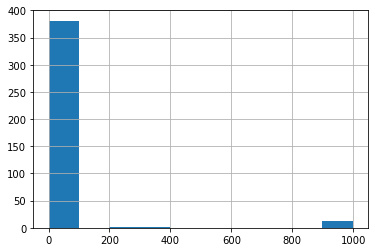

In [71]:
# посмотрим распределение
students.absences.hist()

In [72]:
students.absences.describe()

count    395.000000
mean      37.407595
std      171.983851
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      999.000000
Name: absences, dtype: float64

In [73]:
students.groupby('absences').absences.count()

absences
0.0      111
1.0        3
2.0       60
3.0        8
4.0       53
5.0        5
6.0       31
7.0        6
8.0       21
9.0        3
10.0      17
11.0       2
12.0      12
13.0       2
14.0      12
15.0       2
16.0       7
17.0       1
18.0       5
19.0       1
20.0       4
21.0       1
22.0       3
23.0       1
24.0       1
25.0       1
26.0       1
28.0       1
30.0       1
38.0       1
40.0       1
54.0       1
56.0       1
75.0       1
212.0      1
385.0      1
999.0     12
Name: absences, dtype: int64

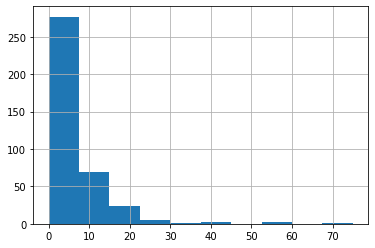

In [74]:
# убираем очевидные выбросы
students[students.absences <= 100].absences.hist()

In [75]:
students[students.absences <= 100].absences.describe()

count    381.000000
mean       5.750656
std        8.088542
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [76]:
students_temp = students[students.absences <= 100]

In [77]:
median = students_temp.absences.median()
IQR = students_temp.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students_temp.absences.quantile(0.25)
perc75 = students_temp.absences.quantile(0.75)
print('медиана: {},'.format(median),'25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

медиана: 4.0, 25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


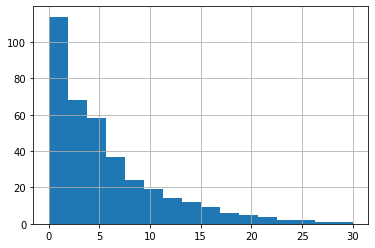

In [78]:
# убираем очевидные выбросы
students[students.absences <= 30].absences.hist(bins = 16);

In [79]:
students[students.absences <= 30].absences.describe()

count    376.000000
mean       5.127660
std        5.854656
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       30.000000
Name: absences, dtype: float64

Очевидно - экспоненциальное распределение

In [80]:
# посмотрим на столбец оценок
students.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [81]:
students.score.unique()

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

In [82]:
# определяем количество пустых значений
students.score.isna().sum()

6

In [83]:
# убираем строки с пропущенными оценками
students = students.dropna(subset=['score'])

In [84]:
len(students)

389

In [85]:
students.score.unique()

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  20.])

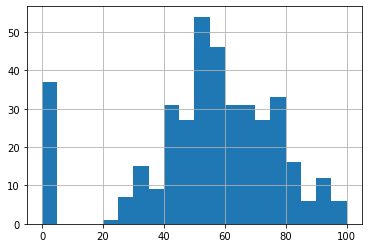

In [86]:
# посмотрим распределение
students.score.hist(bins = 20)

In [87]:
median = students.score.median()
IQR = students.score.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.score.quantile(0.25)
perc75 = students.score.quantile(0.75)
print('медиана: {},'.format(median),'25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

медиана: 55.0, 25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 70.0,  Границы выбросов: [-65.0, 175.0].


Очевидно - нормальное распределение для столюца Score, за исключением выброса в 0 
Возможно, что следует ввести отдельный столбец для признака 0 (отсутствие на экзамене)

In [88]:
# посмотрим корреляцию числовых переменных
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.019252,-0.033431,-0.036352,-0.012084,-0.071415,0.016564,0.054229,-0.000453,0.014979,0.020580,-0.155726
Medu,-0.019252,1.000000,-0.013857,-0.030454,-0.014483,-0.014272,-0.024488,-0.008206,0.205623,-0.033757,-0.022978,-0.070624
Fedu,-0.033431,-0.013857,1.000000,0.048832,-0.032558,0.077446,0.054504,0.104795,-0.034318,0.059789,-0.041896,0.003683
traveltime,-0.036352,-0.030454,0.048832,1.000000,0.035629,0.020059,0.001289,-0.045682,0.027635,0.006996,-0.054762,-0.057513
studytime,-0.012084,-0.014483,-0.032558,0.035629,1.000000,0.048587,-0.036399,0.109940,-0.013893,0.074960,0.205140,0.095271
failures,-0.071415,-0.014272,0.077446,0.020059,0.048587,1.000000,-0.064236,0.036204,-0.032141,0.066040,-0.042294,0.040787
famrel,0.016564,-0.024488,0.054504,0.001289,-0.036399,-0.064236,1.000000,0.025372,-0.038269,-0.045137,-0.047644,-0.009595
freetime,0.054229,-0.008206,0.104795,-0.045682,0.109940,0.036204,0.025372,1.000000,-0.030222,-0.026767,-0.016990,0.038273
goout,-0.000453,0.205623,-0.034318,0.027635,-0.013893,-0.032141,-0.038269,-0.030222,1.000000,-0.029263,-0.019511,-0.058070
health,0.014979,-0.033757,0.059789,0.006996,0.074960,0.066040,-0.045137,-0.026767,-0.029263,1.000000,-0.040484,-0.068515


Корреляция переменных слабая, но могут влиять введенные признаки "99" для незаполненных значений.

Проверим все корреляции для столбцов числовых переменных

age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout, health, absences, score

In [89]:
# Определяем тест Стьюдента
def get_stat_dif(stud_ds, column):
    cols = stud_ds.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    found = False
    for comb in combinations_all:
        if ttest_ind(stud_ds.loc[stud_ds.loc[:, column] == comb[0], 'score'], 
                        stud_ds.loc[stud_ds.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            found = True
            break
            
    if found == False:
        print('Не найдены статистически значимые различия для колонки', column)

16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64

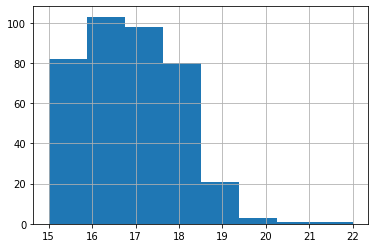

In [90]:
students.age.hist(bins = 8)
students.age.value_counts()

In [91]:
students[['age','score']].corr()

,age,score
age,1.000000,-0.155726
score,-0.155726,1.000000


In [92]:
# Проведем тест Стьюдента
get_stat_dif(students, 'age')

Не найдены статистически значимые различия для колонки age


/Users/st025236/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/st025236/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Распределение похоже на экспоненциальное, корреляция слабая

4.0     131
2.0     100
3.0      96
1.0      56
0.0       3
99.0      3
Name: Medu, dtype: int64

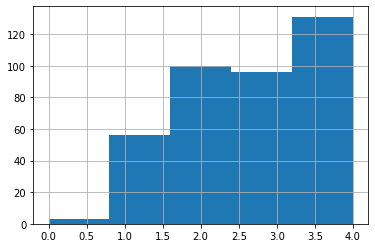

In [93]:
students[students.Medu < 10].Medu.hist(bins = 5)
students.Medu.value_counts()

In [94]:
students[students.Medu < 10][['Medu','score']].corr()

,Medu,score
Medu,1.000000,0.213349
score,0.213349,1.000000


In [95]:
get_stat_dif(students[students.Medu < 10], 'Medu')

Найдены статистически значимые различия для колонки Medu


 Тип распределения непонятен в связи с малым количеством значений, корреляция присутствует

2.0     105
3.0      94
4.0      89
1.0      75
99.0     24
0.0       2
Name: Fedu, dtype: int64

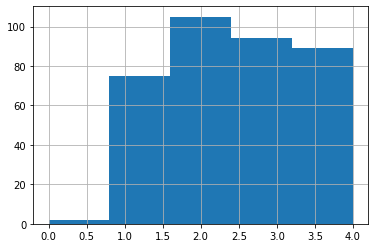

In [96]:
students[students.Fedu < 10].Fedu.hist(bins = 5)
students.Fedu.value_counts()

In [97]:
students[students.Fedu < 10][['Fedu','score']].corr()

,Fedu,score
Fedu,1.000000,0.130923
score,0.130923,1.000000


In [98]:
get_stat_dif(students[students.Fedu < 10], 'Fedu')

Не найдены статистически значимые различия для колонки Fedu


Тип распределения непонятен в связи с малым количеством значений, корреляция отсутствует

1.0     239
2.0      94
99.0     28
3.0      21
4.0       7
Name: traveltime, dtype: int64

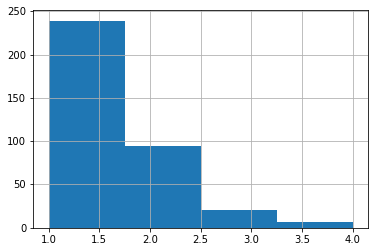

In [99]:
students[students.traveltime < 10].traveltime.hist(bins = 4)
students.traveltime.value_counts()

In [100]:
students[students.traveltime < 10][['traveltime','score']].corr()

,traveltime,score
traveltime,1.000000,-0.070559
score,-0.070559,1.000000


In [101]:
get_stat_dif(students[students.traveltime < 10], 'traveltime')

Не найдены статистически значимые различия для колонки traveltime


Тип распределения непонятен в связи с малым количеством значений, корреляция отсутствует

2.0     189
1.0     103
3.0      63
4.0      27
99.0      7
Name: studytime, dtype: int64

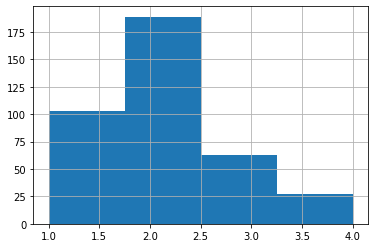

In [102]:
students[students.studytime < 10].studytime.hist(bins = 4)
students.studytime.value_counts()

In [103]:
students[students.studytime < 10][['studytime','score']].corr()

,studytime,score
studytime,1.000000,0.115741
score,0.115741,1.000000


In [104]:
get_stat_dif(students[students.studytime < 10], 'studytime')

Не найдены статистически значимые различия для колонки studytime


Тип распределения непонятен в связи с малым количеством значений, корреляция отсутствует

0.0     290
1.0      48
99.0     22
2.0      15
3.0      14
Name: failures, dtype: int64

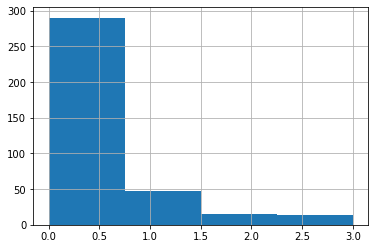

In [105]:
students[students.failures < 10].failures.hist(bins = 4)
students.failures.value_counts()

In [106]:
students[students.failures < 10][['failures','score']].corr()

,failures,score
failures,1.000000,-0.344338
score,-0.344338,1.000000


In [107]:
get_stat_dif(students[students.failures < 10], 'failures')

Найдены статистически значимые различия для колонки failures


Тип распределения непонятен в связи с малым количеством значений, корреляция присутствует

4.0     178
5.0      97
3.0      62
99.0     27
2.0      17
1.0       8
Name: famrel, dtype: int64

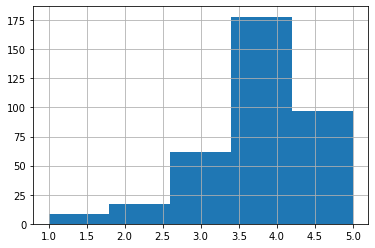

In [108]:
students[students.famrel < 10].famrel.hist(bins = 5)
students.famrel.value_counts()

In [109]:
students[students.famrel < 10][['famrel','score']].corr()

,famrel,score
famrel,1.000000,0.055305
score,0.055305,1.000000


In [110]:
get_stat_dif(students[students.famrel < 10], 'famrel')

Не найдены статистически значимые различия для колонки famrel


Тип распределения непонятен в связи с малым количеством значений, корреляция отсутствует

3.0     152
4.0     110
2.0      63
5.0      37
1.0      18
99.0      9
Name: freetime, dtype: int64

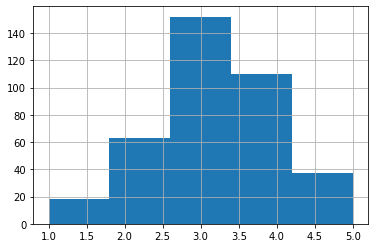

In [111]:
students[students.freetime < 10].freetime.hist(bins = 5)
students.freetime.value_counts()

In [112]:
students[students.freetime < 10][['freetime','score']].corr()

,freetime,score
freetime,1.000000,0.019026
score,0.019026,1.000000


In [113]:
get_stat_dif(students[students.freetime < 10], 'freetime')

Не найдены статистически значимые различия для колонки freetime


Тип распределения непонятен в связи с малым количеством значений, корреляция отсутствует

3.0     126
2.0     101
4.0      81
5.0      51
1.0      23
99.0      7
Name: goout, dtype: int64

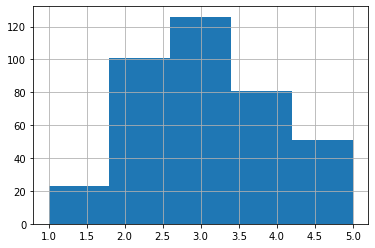

In [114]:
students[students.goout < 10].goout.hist(bins = 5)
students.goout.value_counts()

In [115]:
students[students.goout < 10][['goout','score']].corr()

,goout,score
goout,1.000000,-0.129685
score,-0.129685,1.000000


In [116]:
get_stat_dif(students[students.goout < 10], 'goout')

Найдены статистически значимые различия для колонки goout


Тип распределения непонятен в связи с малым количеством значений, корреляция присутствует

5.0     137
3.0      88
4.0      60
1.0      47
2.0      42
99.0     15
Name: health, dtype: int64

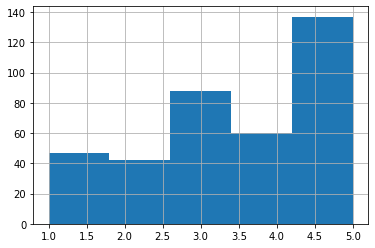

In [117]:
students[students.health < 10].health.hist(bins = 5)
students.health.value_counts()

In [118]:
students[students.health < 10][['health','score']].corr()

,health,score
health,1.00000,-0.07046
score,-0.07046,1.00000


In [119]:
get_stat_dif(students[students.health < 10], 'health')

Не найдены статистически значимые различия для колонки health


Тип распределения непонятен в связи с малым количеством значений, корреляция отсутствует

0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
999.0     11
16.0       7
3.0        7
7.0        6
5.0        5
18.0       5
20.0       4
9.0        3
22.0       3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
40.0       1
38.0       1
17.0       1
212.0      1
23.0       1
19.0       1
54.0       1
30.0       1
56.0       1
24.0       1
28.0       1
385.0      1
21.0       1
75.0       1
26.0       1
Name: absences, dtype: int64

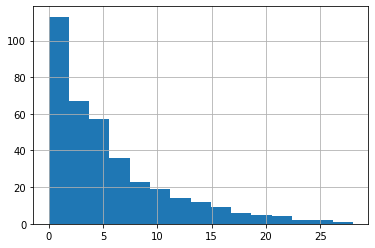

In [120]:
students[students.absences < 30].absences.hist(bins = 15)
students.absences.value_counts()

In [121]:
students[students.absences < 30][['absences','score']].corr()

,absences,score
absences,1.000000,0.076803
score,0.076803,1.000000


In [122]:
get_stat_dif(students[students.absences < 30], 'absences')

Найдены статистически значимые различия для колонки absences


Тип распределения - вероятно экспоненциальное, корреляция присутствует

Для найденных 4 коррелирующих переменных Medu, failures, goout, absences построим boxplots, исключив пропущенные значения в ответах

In [123]:
def get_boxplot_m(column):
    fig, ax = plt.subplots(figsize = (16, 4))
    sns.boxplot(x=column, y='score', 
                data=students[students[col] < 30 ])
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

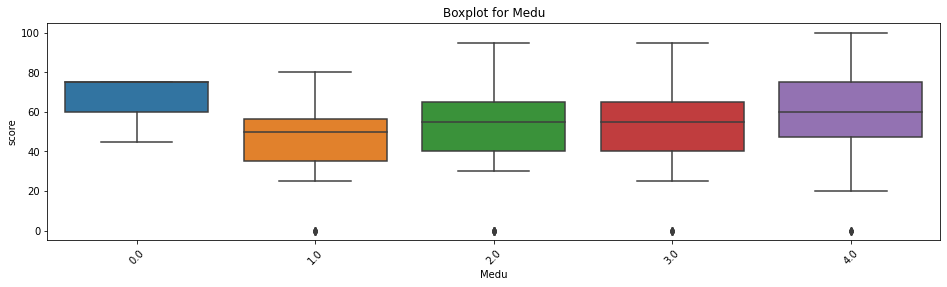

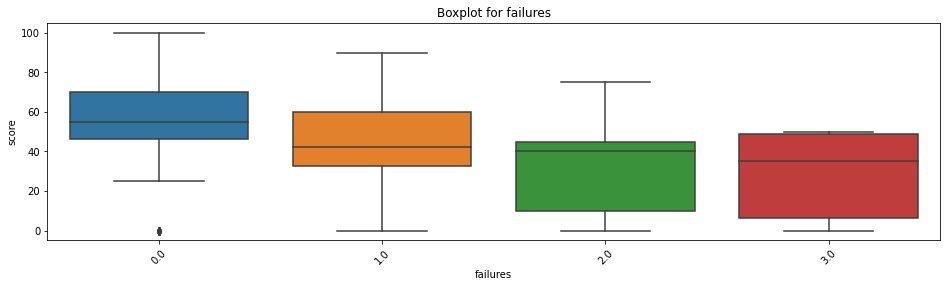

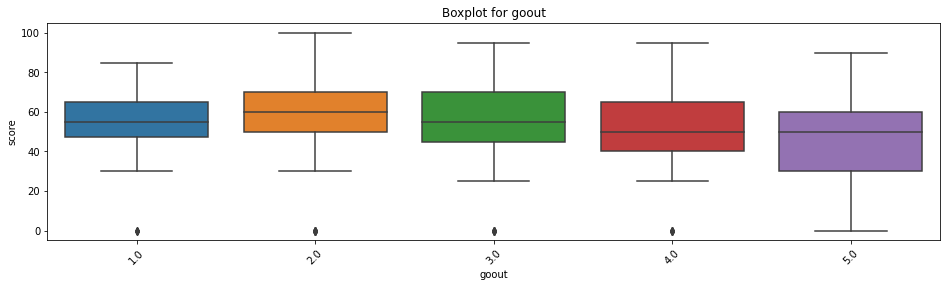

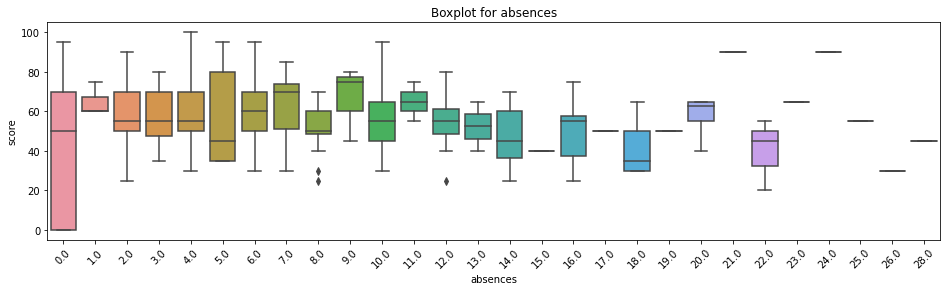

In [124]:
for col in [ 'Medu', 'failures', 'goout', 'absences']:
    get_boxplot_m(col)

После проведенной проверки среди численных переменных можно определить те, которые имеют корреляционную зависимость:
    
Medu, failures, goout, absences

=================================

Проведем анализ номинативных переменных

In [125]:
# получим список номинативных переменных
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

In [126]:
nom_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus',
       'Mjob', 'Fjob', 'reason', 'guardian',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']

In [127]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 4))
    sns.boxplot(x=column, y='score', 
                data=students)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

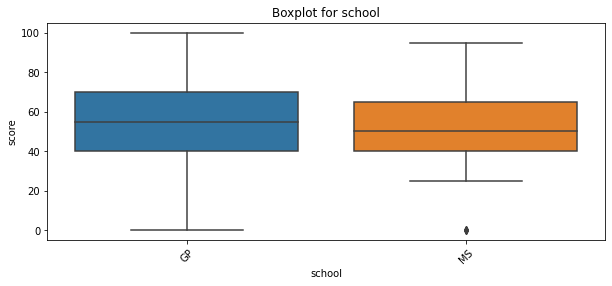

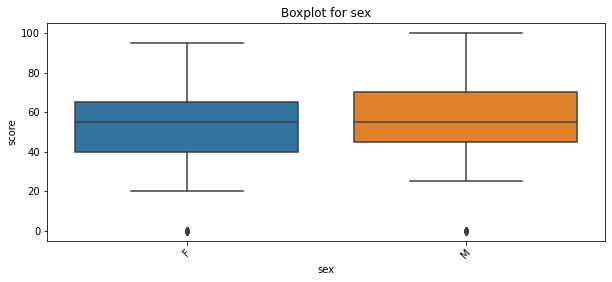

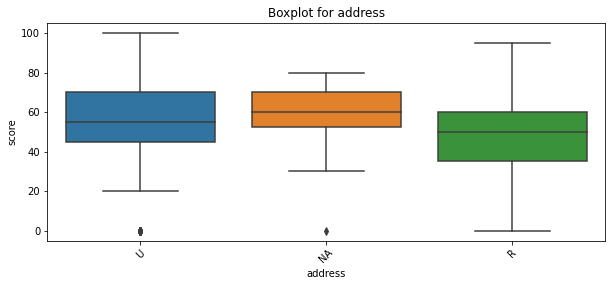

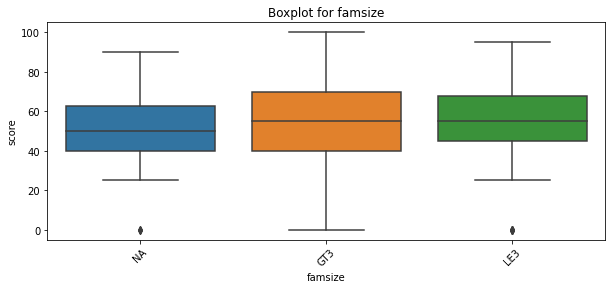

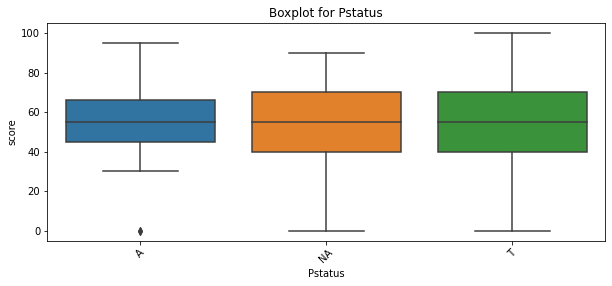

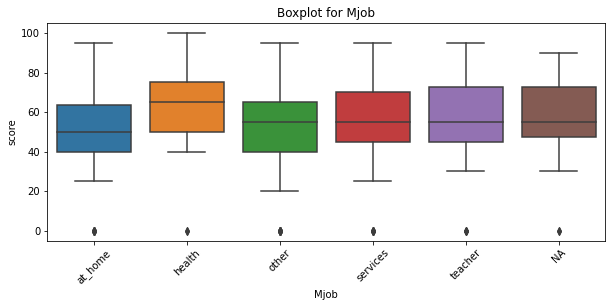

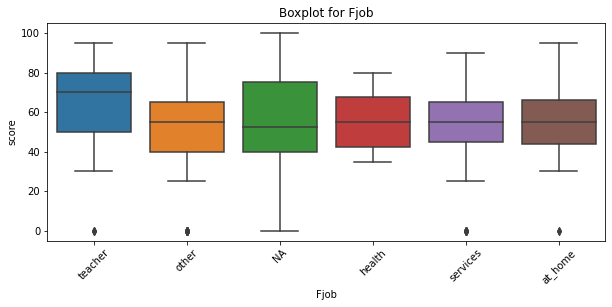

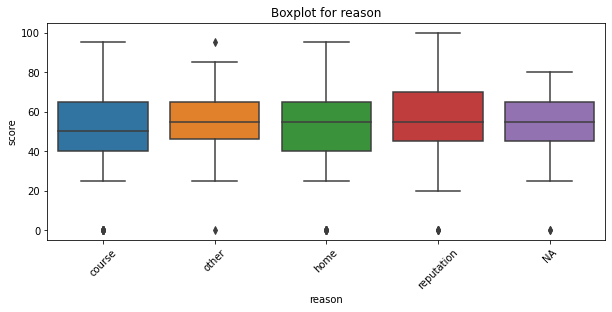

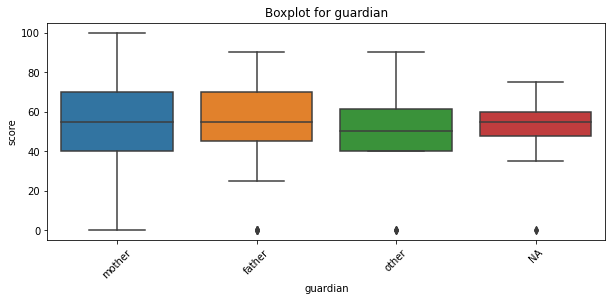

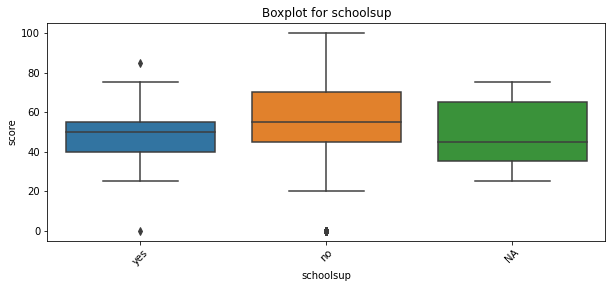

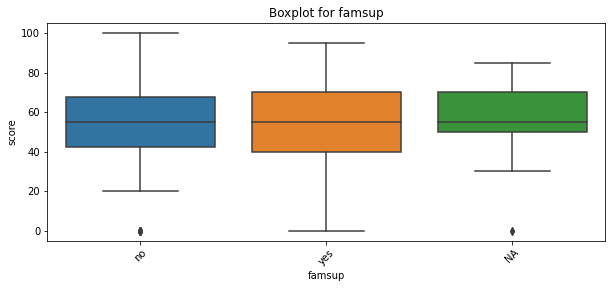

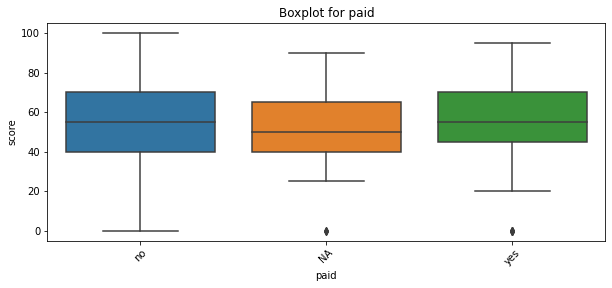

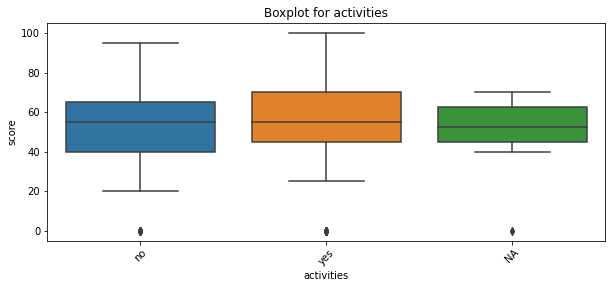

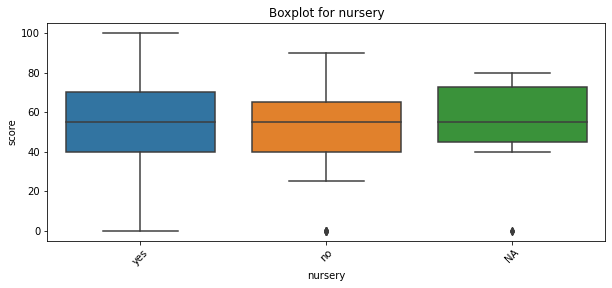

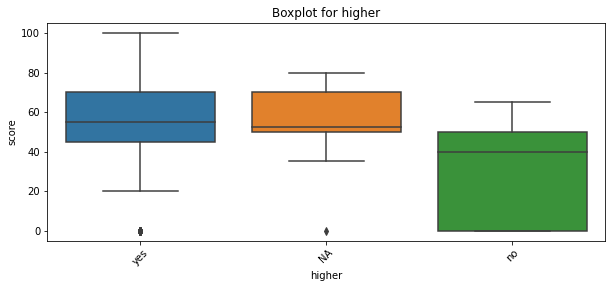

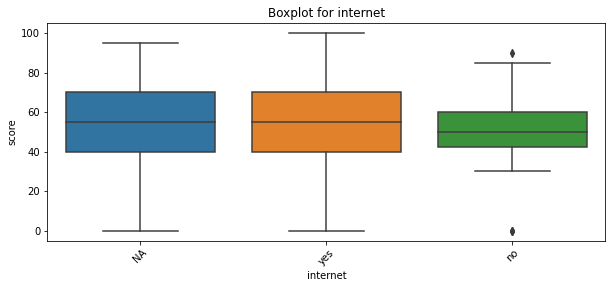

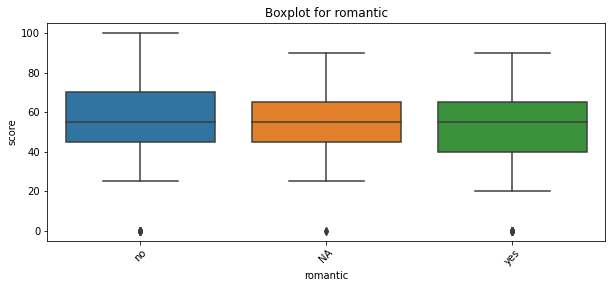

In [128]:
for col in nom_columns:
    get_boxplot(col)

In [129]:
#  Проведем тест Стьюдента среди всех номинативных переменных
for col in nom_columns:
    get_stat_dif(students, col)

Не найдены статистически значимые различия для колонки school
Не найдены статистически значимые различия для колонки sex
Не найдены статистически значимые различия для колонки address
Не найдены статистически значимые различия для колонки famsize
Не найдены статистически значимые различия для колонки Pstatus
Не найдены статистически значимые различия для колонки Mjob
Не найдены статистически значимые различия для колонки Fjob
Не найдены статистически значимые различия для колонки reason
Не найдены статистически значимые различия для колонки guardian
Не найдены статистически значимые различия для колонки schoolsup
Не найдены статистически значимые различия для колонки famsup
Не найдены статистически значимые различия для колонки paid
Не найдены статистически значимые различия для колонки activities
Не найдены статистически значимые различия для колонки nursery
Найдены статистически значимые различия для колонки higher
Не найдены статистически значимые различия для колонки internet
Найде

Найдено две коррелирующие переменные - higher и romantic

In [130]:
# уточним тест, убрав из выборки все значения с пропусками (ответ 'NA')
for col in nom_columns:
    get_stat_dif(students[students[col] != 'NA'], col)

Не найдены статистически значимые различия для колонки school
Не найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Не найдены статистически значимые различия для колонки famsize
Не найдены статистически значимые различия для колонки Pstatus
Найдены статистически значимые различия для колонки Mjob
Не найдены статистически значимые различия для колонки Fjob
Не найдены статистически значимые различия для колонки reason
Не найдены статистически значимые различия для колонки guardian
Не найдены статистически значимые различия для колонки schoolsup
Не найдены статистически значимые различия для колонки famsup
Не найдены статистически значимые различия для колонки paid
Не найдены статистически значимые различия для колонки activities
Не найдены статистически значимые различия для колонки nursery
Найдены статистически значимые различия для колонки higher
Не найдены статистически значимые различия для колонки internet
Найдены ста

Найдено 4 коррелирующие переменные - addres, Mjob, higher и romantic

Построим boxplot для найденных 4 переменных

In [131]:
def get_boxplot_mod(column):
    fig, ax = plt.subplots(figsize = (10, 4))
    sns.boxplot(x=column, y='score', 
                data=students[students[col] != 'NA'])
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

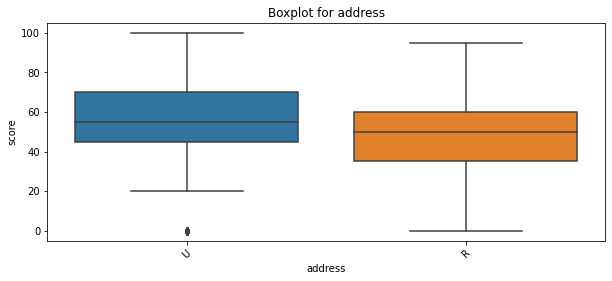

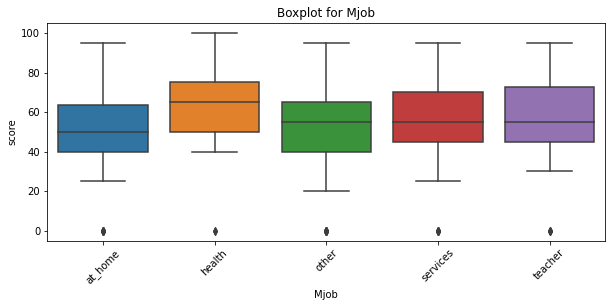

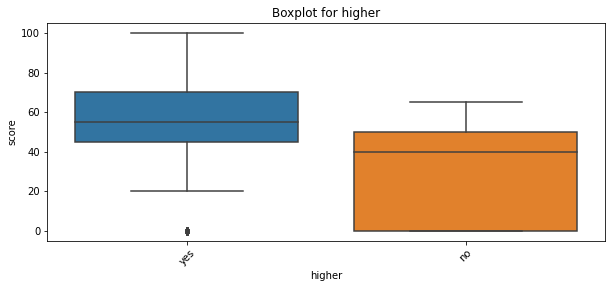

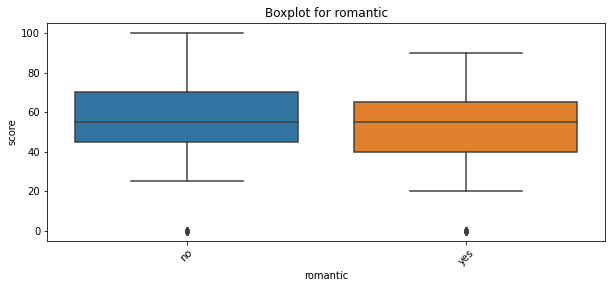

In [132]:
for col in ['address', 'Mjob', 'higher', 'romantic']:
    get_boxplot_mod(col)

Удалим все незначимые переменные, оставив в датасете 9 столбцов.

In [133]:
students = students[['address', 'Mjob', 'higher', 'romantic','Medu', 'failures', 'goout', 'absences','score']]

In [134]:
students

,address,Mjob,higher,romantic,Medu,failures,goout,absences,score
0,U,at_home,yes,no,4.0,0.0,4.0,6.0,30.0
1,U,at_home,yes,no,1.0,0.0,3.0,4.0,30.0
2,U,at_home,yes,NA,1.0,3.0,2.0,10.0,50.0
3,U,health,yes,yes,4.0,0.0,2.0,2.0,75.0
4,U,other,yes,no,3.0,0.0,2.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...
390,U,services,yes,no,2.0,2.0,4.0,212.0,45.0
391,U,services,yes,no,3.0,0.0,5.0,3.0,80.0
392,R,other,NA,no,1.0,3.0,3.0,3.0,35.0
393,R,services,yes,no,3.0,0.0,1.0,0.0,50.0


Приведем все численные значения к типу int, поскольку они все являются целочисленными

In [135]:
students['Medu'] = students['Medu'].astype(int)
students['failures'] = students['failures'].astype(int)
students['goout'] = students['goout'].astype(int)
students['absences'] = students['absences'].astype(int)
students['score'] = students['score'].astype(int)

In [136]:
students

,address,Mjob,higher,romantic,Medu,failures,goout,absences,score
0,U,at_home,yes,no,4,0,4,6,30
1,U,at_home,yes,no,1,0,3,4,30
2,U,at_home,yes,NA,1,3,2,10,50
3,U,health,yes,yes,4,0,2,2,75
4,U,other,yes,no,3,0,2,4,50
...,...,...,...,...,...,...,...,...,...
390,U,services,yes,no,2,2,4,212,45
391,U,services,yes,no,3,0,5,3,80
392,R,other,NA,no,1,3,3,3,35
393,R,services,yes,no,3,0,1,0,50


В результате работы был проведен анализ первичных данных. Первичные данные не очень высокого качества. Большое количество незаполненных данных. Заполнить пропуски не представляется возможным, так как на данном этапе сложно предсказать закономерности данных.

В результате все пропуски были заменены на "заглушки" - строки 'NA' для номинативных переменных, численные значения 99 или 999 для числовых переменных.
Также возникла необходимость корректировки ошибочно введенных данных

Выявлено нормальное распределение для переменной score и экспоненциальное распределение для переменной absence.
Проведенные тесты Стьюдента позволили выделить 8 переменных, которые коррелируют с переменной score. 
Это переменные 'address', 'Mjob', 'higher', 'romantic','Medu', 'failures', 'goout', 'absences'
Анализ был затруднен необходимостью отбрасывания незаполненных значений при построении графиков и проведении тестов.

Полученные данные пригодны для последующего анализа

Недостатком полученной выборки является большое количество "заглушек" на месте пропущенных данных, что сильно влияет на возможность корректного анализа.
Необходимо найти способ решения этой проблемы - удаление этих данных или различные варианты аппроксимации.